In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [222]:
def gen_data(eps_var=0.25):
    x = np.sort(np.random.normal(0, 1, (100)))
    eps = np.random.normal(0, eps_var, (100))
    y = -1 + 0.5 * x + eps
    return x, y

In [223]:
x1,y1 = gen_data()

**What is the length of the vector y?**

100

**What are the values of β0 and β1 in this linear model?**

β0 = -1, β1 = 0.5

**Create a scatterplot displaying the relationship between x and
y. Comment on what you observe.**

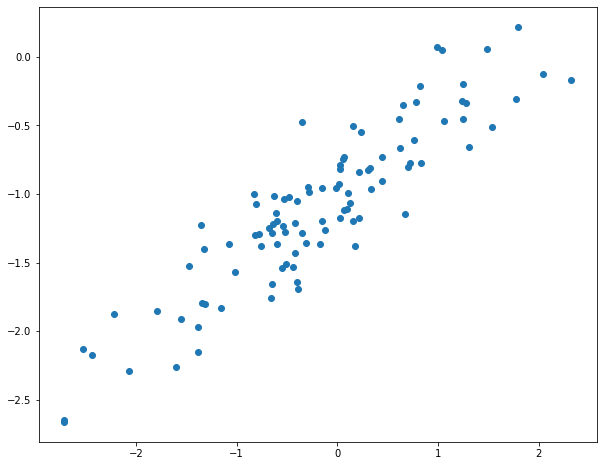

In [224]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x1, y1)

**Fit a least squares linear model to predict y using x.**

In [225]:
line_fit_1 = sm.OLS(y1, sm.add_constant(x1)).fit()

**Comment
on the model obtained. How do βˆ0 and βˆ1 compare to β0 and
β1?**

β0 = -1, β1 = 0.5

βˆ0 = -0.9859, βˆ1 = 0.4955


In [226]:
print(line_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     305.0
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           7.45e-32
Time:                        21:22:20   Log-Likelihood:                -10.457
No. Observations:                 100   AIC:                             24.91
Df Residuals:                      98   BIC:                             30.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0161      0.027    -37.382      0.0

**Display the least squares line on the scatterplot.
Draw the population regression line on the plot, in a different
color**

In [227]:
predicted_y_1 = line_fit_1.params[0] + x1 * line_fit_1.params[1]
real_y_1 = -1 + x1 * 0.5

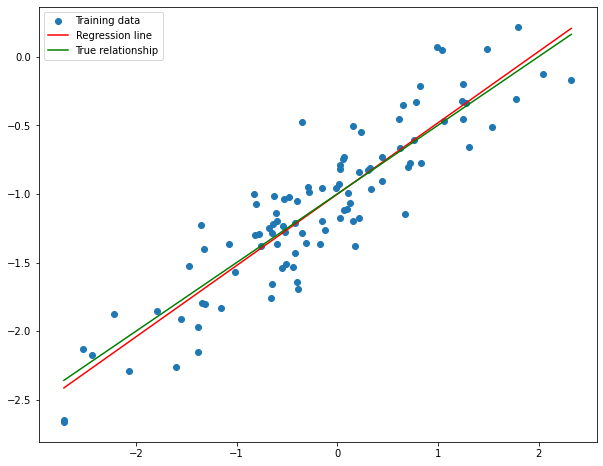

In [228]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x1, y1, label="Training data")
ax.plot(x1, predicted_y_1, c="red", label="Regression line")
ax.plot(x1, real_y_1, c="green", label="True relationship")
ax.legend()

**Now fit a polynomial regression model that predicts y using x
and x2. Is there evidence that the quadratic term improves the
model fit? Explain your answer.**

R^2 is better. But the model is not good when predicting for larger x

In [229]:
square_fit = smf.ols(formula="y ~ x + np.power(x, 2)", data={"y": y1, "x": x1}).fit()

In [230]:
print(square_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     216.6
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           1.66e-36
Time:                        21:22:26   Log-Likelihood:                -4.3889
No. Observations:                 100   AIC:                             14.78
Df Residuals:                      97   BIC:                             22.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.9863      0.031    -31.

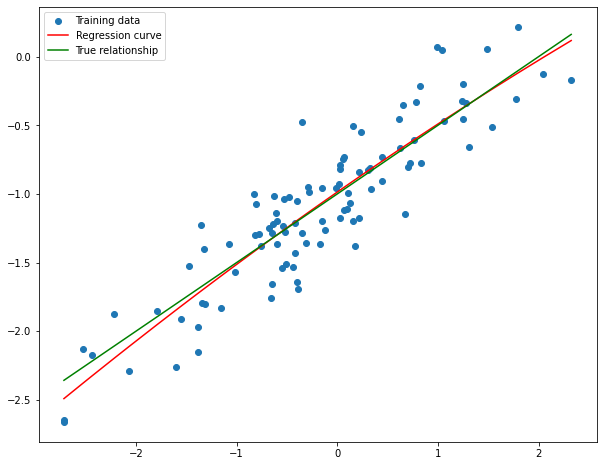

In [232]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x1, y1, label="Training data")
ax.plot(x1, square_fit.fittedvalues, c="red", label="Regression curve")
ax.plot(x1, real_y_1, c="green", label="True relationship")
ax.legend()

**Modify the data generation process in
such a way that there is less noise in the data**

In [233]:
x2,y2 = gen_data(eps_var=0.1)

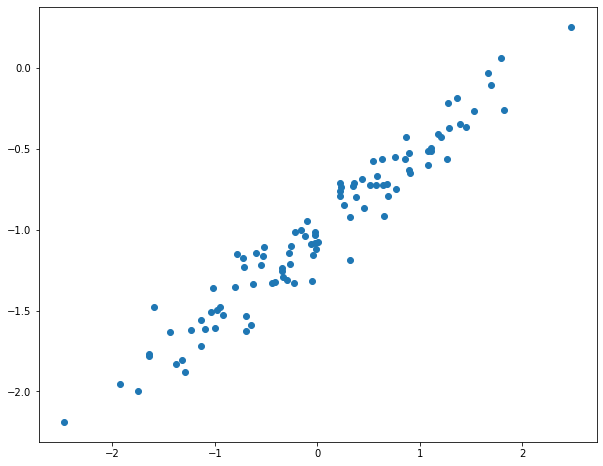

In [234]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x2, y2)

In [235]:
line_fit_2 = sm.OLS(y2, sm.add_constant(x2)).fit()

R^2 = 0.971 is much better then the previous R^2 = 0.757

In [236]:
print(line_fit_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     1513.
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           2.20e-61
Time:                        21:23:13   Log-Likelihood:                 66.917
No. Observations:                 100   AIC:                            -129.8
Df Residuals:                      98   BIC:                            -124.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0149      0.013    -81.055      0.0

In [237]:
predicted_y_2 = line_fit_2.params[0] + x2 * line_fit_2.params[1]
real_y_2 = -1 + x2 * 0.5

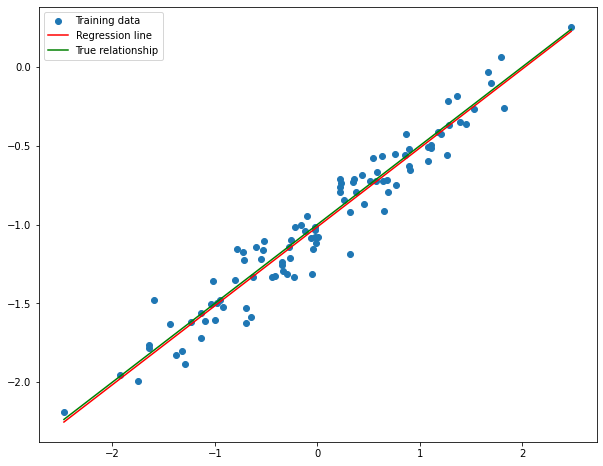

In [238]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x2, y2, label="Training data")
ax.plot(x2, predicted_y_2, c="red", label="Regression line")
ax.plot(x2, real_y_2, c="green", label="True relationship")
ax.legend()

**Modify the data generation process in
such a way that there is more noise in the data**

In [239]:
x3,y3 = gen_data(eps_var=0.4)

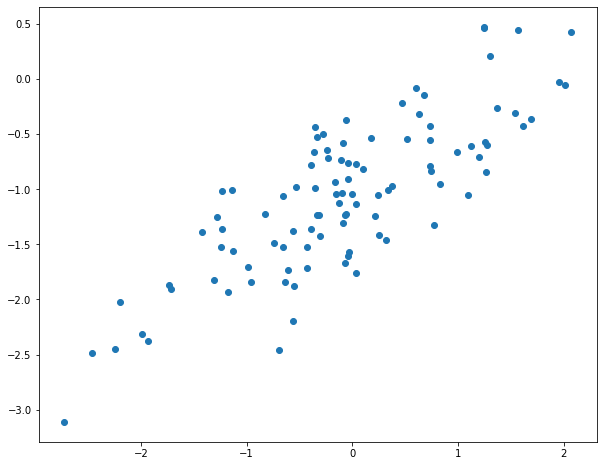

In [240]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x3, y3)

In [241]:
line_fit_3 = sm.OLS(y3, sm.add_constant(x3)).fit()

R^2 squared is much worse

In [242]:
print(line_fit_3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     183.5
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           3.47e-24
Time:                        21:23:17   Log-Likelihood:                -52.615
No. Observations:                 100   AIC:                             109.2
Df Residuals:                      98   BIC:                             114.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0216      0.041    -24.624      0.0

In [243]:
predicted_y_3 = line_fit_3.params[0] + x3 * line_fit_3.params[1]
real_y_3 = -1 + x3 * 0.5

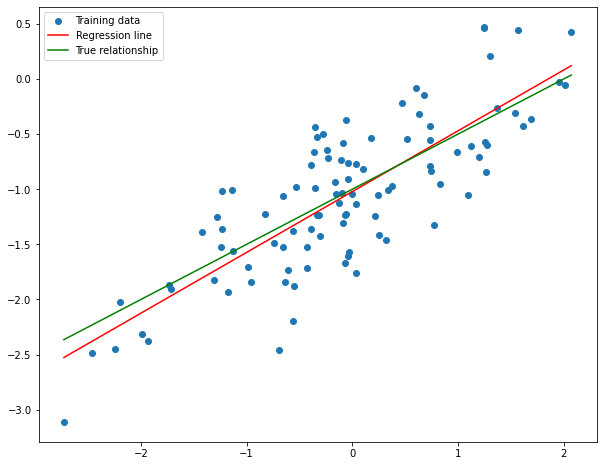

In [244]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x3, y3, label="Training data")
ax.plot(x3, predicted_y_3, c="red", label="Regression line")
ax.plot(x3, real_y_3, c="green", label="True relationship")
ax.legend()

**What are the confidence intervals for β0 and β0 based on the
original data set, the noisier data set, and the less noisy data
set?**

alpha = 0.05, i.e. with 95% probability the true β0 and β1 are in the specified intervals

In [254]:
line_fit_1.conf_int()

array([[-1.05365501, -0.95012768],
       [ 0.4700194 ,  0.56912531]])

In [250]:
line_fit_2.conf_int()

array([[-1.03973752, -0.99004222],
       [ 0.47512534,  0.52621321]])

In [251]:
line_fit_3.conf_int()

array([[-1.10391904, -0.93926008],
       [ 0.47064711,  0.63220506]])